<a href="https://colab.research.google.com/github/souadg/CAS-ADS-Project2/blob/main/M2_Project_Elias_Souad_v2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 Project: Student Performance


## Importing Libraries

In [251]:
# Import libraries

# Basic libraries
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
import statsmodels.api as sm
from scipy import stats
import statsmodels.stats.api as sms # Goldfeld Quandt Test
import statsmodels.formula.api as smf # ols

## Load Data Set

In [252]:
# Display more rows in head
pd.set_option('display.max_rows', 6) 

In [253]:
# Read comma separated value file
url = "https://raw.githubusercontent.com/souadg/CAS-ADS-Project2/main/StudentsPerformance.csv"
df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [254]:
print("There are %d rows and %d columns in the data frame" %(df.shape[0], df.shape[1]))

There are 1000 rows and 8 columns in the data frame


In [255]:
# Replace spaces and slash in column names with underscore
df.columns = ['gender', 'race_ethn', 'parental_ed', 'lunch', 'test_prep', 'maths_score', 'read_score', 'write_score']
df.head()

,gender,race_ethn,parental_ed,lunch,test_prep,maths_score,read_score,write_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [256]:
df.tail()

,gender,race_ethn,parental_ed,lunch,test_prep,maths_score,read_score,write_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [257]:
# Types of variables, number of rows, columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       1000 non-null   object
 1   race_ethn    1000 non-null   object
 2   parental_ed  1000 non-null   object
 3   lunch        1000 non-null   object
 4   test_prep    1000 non-null   object
 5   maths_score  1000 non-null   int64 
 6   read_score   1000 non-null   int64 
 7   write_score  1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Descriptive Statistics


In [258]:
# Get general information on descriptive statistics
df.describe()

,maths_score,read_score,write_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
...,...,...,...
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


An idea would be to consolidate the parental education background into two categories: 

- up to and including high school
- university

[Associate's degree](https://en.wikipedia.org/wiki/Associate_degree) is obtained after graduating from high school.

In [259]:
# List of values for high school
lst_hs = ['some high school', 'high school']
df.loc[df['parental_ed'].isin(lst_hs), 'parent_uni'] = "no"

# Complement of high school list
df.loc[~df['parental_ed'].isin(lst_hs), 'parent_uni'] = "yes"
df.head()

,gender,race_ethn,parental_ed,lunch,test_prep,maths_score,read_score,write_score,parent_uni
0,female,group B,bachelor's degree,standard,none,72,72,74,yes
1,female,group C,some college,standard,completed,69,90,88,yes
2,female,group B,master's degree,standard,none,90,95,93,yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,yes
4,male,group C,some college,standard,none,76,78,75,yes


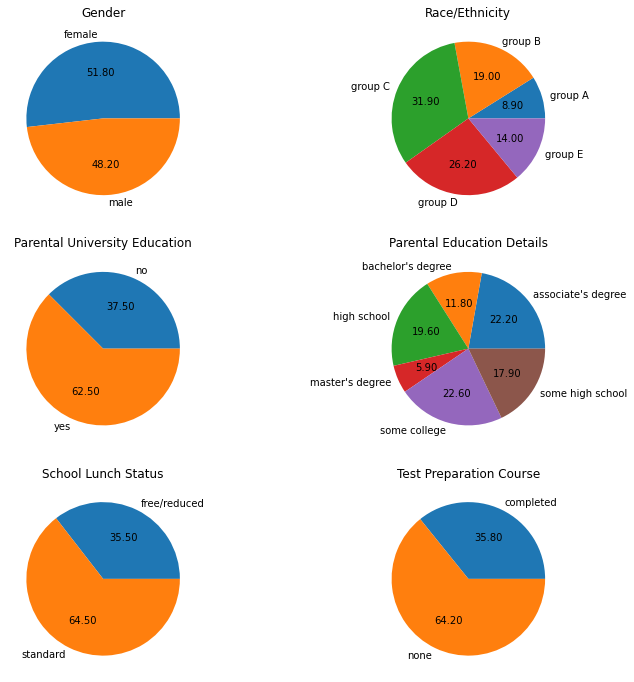

In [260]:
plt.figure(figsize=(12, 12))
plt.subplot(321)
ax1 = df.groupby('gender').size().plot(kind = 'pie', autopct = '%.2f')
ax1.title.set_text("Gender")
plt.ylabel("")
plt.subplot(322)
ax2 = df.groupby('race_ethn').size().plot(kind = "pie", autopct = "%.2f")
ax2.title.set_text("Race/Ethnicity")
plt.ylabel("")
plt.subplot(323)
ax3 = df.groupby('parent_uni').size().plot(kind = "pie", autopct = "%.2f")
ax3.title.set_text("Parental University Education")
plt.ylabel("")
plt.subplot(324)
ax4 = df.groupby('parental_ed').size().plot(kind = "pie", autopct = "%.2f")
ax4.title.set_text("Parental Education Details")
plt.ylabel("")
plt.subplot(325)
ax5 = df.groupby('lunch').size().plot(kind = "pie", autopct = "%.2f")
ax5.title.set_text("School Lunch Status")
plt.ylabel("")
plt.subplot(326)
ax6 = df.groupby('test_prep').size().plot(kind = "pie", autopct = "%.2f")
ax6.title.set_text("Test Preparation Course")
plt.ylabel("")
plt.show()

We can use histograms to see how the exam scores differ for a categorical variable such as gender. Similar histograms could be generated for lunch, race, parental level of education, and test preparation course.

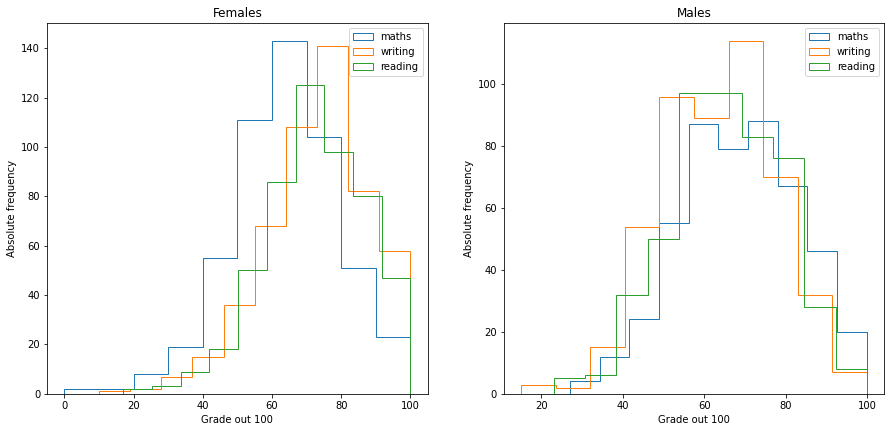

In [261]:
# Filter data frame by gender
df_female = df[df['gender']=='female']
df_male = df[df['gender']=='male']

# Plot female scores
plt.figure(figsize=(15, 15))
plt.subplot(221)
df_female['maths_score'].plot(kind="hist", fill= False,histtype='step',title = 'Females', label = 'maths')
df_female['write_score'].plot(kind="hist", fill= False,histtype='step',title = 'Females', label = 'writing')
ax = df_female['read_score'].plot(kind="hist", fill= False, histtype='step', label="reading")
ax.set_xlabel('Grade out 100')
ax.set_ylabel('Absolute frequency')
plt.legend()

# Plot male scores
plt.subplot(222)
df_male['maths_score'].plot(kind="hist", fill= False,histtype='step',title = 'Males', label = 'maths')
df_male['write_score'].plot(kind="hist", fill= False,histtype='step',title = 'Males', label = 'writing')
ax = df_male['read_score'].plot(kind="hist", fill= False, histtype='step', label="reading")
ax.set_xlabel('Grade out 100')
ax.set_ylabel('Absolute frequency')
plt.legend()

plt.show()

## Hypothesis 1: Maths Score and Gender

We denote the working hypothesis as H<sub>1</sub> and the null hypothesis as H<sub>0</sub>.


### Defining Hypothesis

**H<sub>1</sub>**: male students have higher maths scores than female students.

**H<sub>0</sub>**: male students have $\leq$ maths scores than female students.

On inspection, we find that the mean of the male maths score is higher than that of the female maths score.

In [262]:
print("Mean maths scores are %1.2f for females and %1.2f for males" %(df_female["maths_score"].mean(), df_male["maths_score"].mean()))

Mean maths scores are 63.63 for females and 68.73 for males


### Testing for Normal Distribution

Some statistical tests assume that the samples to be tested come from a normal distribution. To be able to choose the appropriate tests, we must thus first check if our samples come from a normal distribution. We can test for normality  using a qq-plot or a normality test.

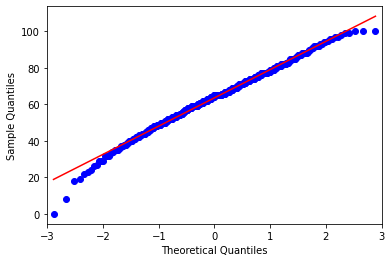

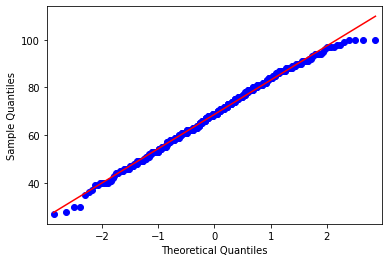

In [263]:
# QQ-Plot
# TODO: Add titles and put in one figure
# Female maths score
sm.qqplot(df_female['maths_score'], line='s')
# Male maths score
sm.qqplot(df_male['maths_score'], line='s')
plt.show()

The null hypothesis of the D'Agostino-Pearson test is normal distribution. If the resulting *p*-value is larger than 0.001 we cannot reject the normality of the distribution.

**Question**: should we pick a different value for $\alpha$?

**Answer (Elias)**: $\alpha$ is in the end an arbitrarily chosen value, but see the addition below.

**Answer (Souad)**: Actually I checked the literature,  most tests use $\alpha = 0.05$. This means that both Pearson and Shapiro reject the null hypotesis, i.e. reject normality.

In [264]:
# Normality test female maths score
# D Agostino-Pearson. The method returns the test statistic value and the p-value
k2, p = stats.normaltest(df_female['maths_score']) 
alpha = 0.05 # Rejection criterion defined by you
print('Alpha = ', alpha)
print('p = ', p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("We can reject the null hypothesis of normality of female maths score")
else:
  print("We cannot reject the null hypothesis of normality of female maths score")

Alpha =  0.05
p =  0.0007002831165387053
We can reject the null hypothesis of normality of female maths score


In [265]:
# Normality test male maths score
k2, p = stats.normaltest(df_male['maths_score']) 
alpha = 0.05 # Rejection criterion defined by you
print('Alpha = ', alpha)
print('p = ', p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("We can reject the null hypothesis of normality of male maths score")
else:
  print("We cannot reject the null hypothesis of normality of male maths score")

Alpha =  0.05
p =  0.06459355656271938
We cannot reject the null hypothesis of normality of male maths score


It looks like the normality assumption for the female maths score does not hold.


Note, however, also the *p*-values for both samples in question retrieved from the Shapiro-Wilk test for normality (this test can be used for samples between 3 $\leq$ n $\leq$ 5000): 

In [266]:
s,p = stats.shapiro(df_female['maths_score'])
print('Test statistic = %.2f, p-value = %.2e' %(s, p))

Test statistic = 0.99, p-value = 3.52e-03


In [267]:
s,p = stats.shapiro(df_male['maths_score'])
print('Test statistic = %.2f, p-value = %.2e' %(s, p))

Test statistic = 0.99, p-value = 3.80e-02


These *p*-values suggest that the normality assumptions do not hold for neither males nor females.


### Mann-Whitney U test
It appears that the most apporpriate test is the Mann-Whitney U test for two independent samples, non-normally distributed.

Note that this test should only be used with at least 20 data points.


In [268]:
df_female['maths_score'].size

518

In [269]:
df_male['maths_score'].size

482

In [270]:
t, p = stats.mannwhitneyu(df_male['maths_score'],df_female['maths_score'], alternative='greater')
print("The p-value of the Mann-Whitney U test is %1.2e" %p)

The p-value of the Mann-Whitney U test is 2.14e-07


The *p*-value is $2.14 \times 10^{-7}$, therefore we can reject the null hypothesis: it is very unlikely that male maths scores are lower than female maths scores or equal. 

Did you write this **Elias**? 

*Thus, our working hypothesis (alternative hypothesis) is confirmed that the math scores of male students are higher than those of female students.*

A hypothesis test does **not** confirm the working hypothesis. It merely allows us to reject the null hypothesis with a certain confidence.
I suggest replacing the above with:

*There is strong evidence that male students perform better in maths test than their female counterparts.*

## Hypothesis 2: Test Performance and Parental University Education

Here we make the hypothesis that there is no relation between the students' test performance and whether their parents went to university or not.

For this purpose, we created a column <code>parent_univ</code> which indicates whether the parents had go to university/college or not.

In addition, we will create an additional feature <code>average_score</code> which averages the maths, reading and writing tests.

In [271]:
df['average_score'] = round(df[['maths_score', 'read_score', 'write_score']].mean(axis = 1), 2)
df.head()

,gender,race_ethn,parental_ed,lunch,test_prep,maths_score,read_score,write_score,parent_uni,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,yes,72.67
1,female,group C,some college,standard,completed,69,90,88,yes,82.33
2,female,group B,master's degree,standard,none,90,95,93,yes,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,yes,49.33
4,male,group C,some college,standard,none,76,78,75,yes,76.33


### Defining Hypothesis

**H<sub>1</sub>**: There is no relation between overall student performance and whether their parents went to university.

**H<sub>0</sub>**: There is a relation between the overall student performance and whether their parents went to university.

So we have two samples: Students whose parents went to university and those whose parents did not attend university.

In [272]:
df_uni = df.loc[df['parent_uni'] == "yes", 'average_score']
df_no_uni = df.loc[df['parent_uni'] != "yes",  'average_score']

In [273]:
df_no_uni.head()

8     65.00
9     49.33
12    73.00
15    74.00
16    87.67
Name: average_score, dtype: float64

In [274]:
df_uni.head()

0    72.67
1    82.33
2    92.67
3    49.33
4    76.33
Name: average_score, dtype: float64

### Testing for Normal Distribution



In [275]:
# Normality test students with parents who went to uni


In [276]:
# Normality test students with parents who did not attend uni


It looks like the normality assumption $\ldots$

In [277]:
# Hypothesis test

We can therefore $\ldots$

Now, we can check another working hypothesis: students whose parents went to university perform better in general comapred to those whose parents did not attend university.

At a first glance:

In [278]:
# Mean 1
print("Average performance of students whose parents went to university is on average:" )

Average performance of students whose parents went to university is on average:


In [279]:
print("Average performance of students whose parents did not attend university is on average:" )

Average performance of students whose parents did not attend university is on average:


### Hypothesis Test (replace with name)



In [280]:
# Hypothesis test

The *p*-value is $\ldots$ This means $\ldots$

## Hypothesis 3: Test Performance and Preparation



### Defining Hypothesis

**H<sub>1</sub>**: Students who had completed the preparation test performed better than those who did not.

**H<sub>0</sub>**: Students who completed the preparation test did not perform better than those who did not.

Let us plot a histogram of the overall performance of students who completed the test preparation and those who did not, and the respective probability denstiy function estimations.

Text(0.5, 0.98, 'Overall performance vs. test preparation')

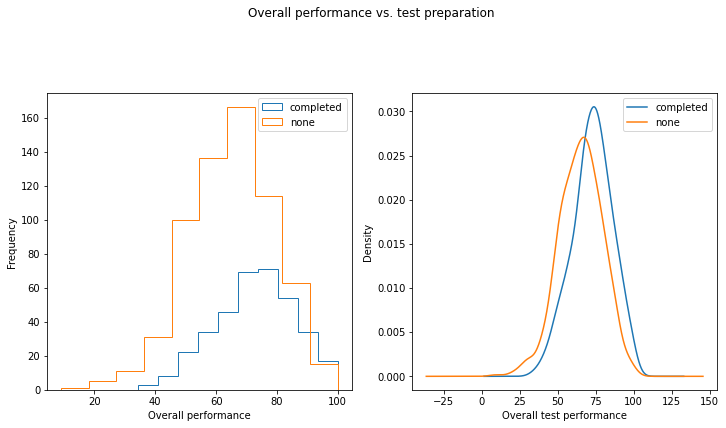

In [281]:
fig = plt.figure(figsize=(12, 12))
plt.subplot(221)
df.groupby('test_prep')['average_score'].plot(kind='hist', fill = False, legend=True, histtype='step')
plt.xlabel('Overall performance')
plt.subplot(222)
df.groupby('test_prep')['average_score'].plot.kde()
plt.xlabel('Overall test performance')
plt.legend()
fig.suptitle('Overall performance vs. test preparation')


Upon inspection, students who completed the preparation course scored better on average than those who did not.

In [282]:
df.groupby('test_prep')['average_score'].mean()

test_prep
completed    72.669469
none         65.038801
Name: average_score, dtype: float64

### Testing for Normal Distribution

There are two samples with unequal sizes.

In [283]:
df0 = df[df['test_prep'] == 'none']['average_score']
df1 = df[df['test_prep'] != 'none']['average_score']
df0.size, df1.size

(642, 358)

In [284]:
# Normality test 1

In [285]:
# Normality test 2

It looks like the normality assumption $\ldots$

### Hypothesis Test (replace with name)

## Hypothesis 4: Average Score and Gender




### Defining Hypothesis

## Linear Regression

We would like to predict test scores based on demographic and socioeconomic factors with a linear regression model.

### Outcome
- average test score

### Predictors
- gender
- race/ethnicity
- lunch
- parental level of education
- test preparation course.

Note that <code>parent_uni</code> was derived from <code>parental_ed</code> so only one of these two variables should be used in the prediction models.

### The Model

We will use the <code>ols</code> (ordinary least squares) method from the <code>statsmodels.formula.api</code> library. 


In [286]:
# Linear regression method using statsmodels.formula.api.ols
# ols: ordinary least squares
model_linreg = smf.ols("average_score ~ gender + race_ethn + lunch + test_prep + parent_uni", data = df).fit()
print(model_linreg.summary())

                            OLS Regression Results                            
Dep. Variable:          average_score   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     37.72
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           1.67e-52
Time:                        20:49:53   Log-Likelihood:                -3942.8
No. Observations:                1000   AIC:                             7904.
Df Residuals:                     991   BIC:                             7948.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               62.2621 

### Check Linear Regression Assumptions

#### Linearity

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


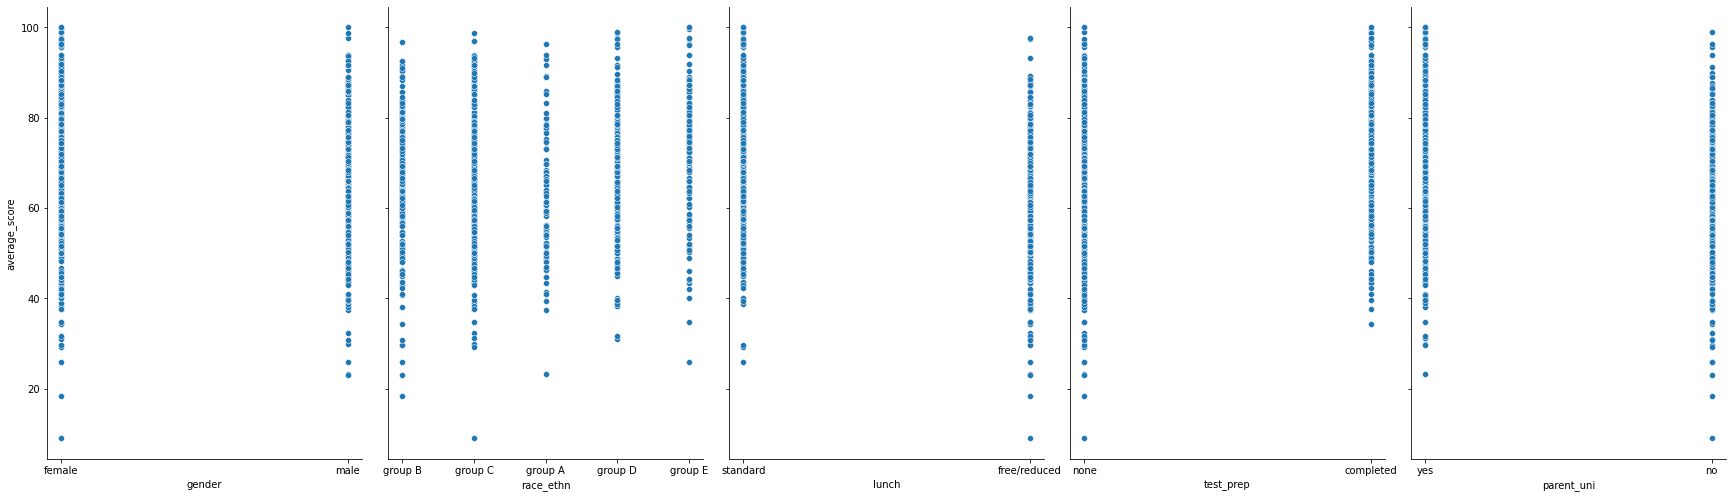

In [287]:
# Visualise the relationship between the features and the response using scatterplots
p = sns.pairplot(df, x_vars=['gender', 'race_ethn', 'lunch', 'test_prep', 'parent_uni'], y_vars='average_score', size=7, aspect=0.7)

Difficult to see a linear relation given features are categorical.

We can use a test as shown on the [statsmodel library page](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html). The **Harvey-Collier multiplier** tests for Null hypothesis that the linear specification is correct:



In [288]:
# t, p = sms.linear_harvey_collier(model_linreg)
# print("p-value is %1.2e" %p)

We get an error: <code>LinAlgError: Singular matrix</code> which indicates that the matrix is singular, meaning some features are correlated. We explore this further in the following section.

#### Multicollinearity

Condition number:

In [289]:
np.linalg.cond(model_linreg.model.exog)

13.170749946543639

According to this [article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6900425/), a condition number between 10 and 30 indicates the presence of multicollinearity.

We could check this further by calculating the variance influence factors (VIF). A VIF of over 10 for some feature indicates that over 90% of the variance in that feature is explained by the remaining features. Over 100 indicates over 99%.



In [290]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(model_linreg.model.exog, i) for i in range(model_linreg.model.exog.shape[1])]
print(vif)


[17.324888092512918, 1.011036917666894, 2.553477691065999, 3.159092001545937, 2.9294344049925987, 2.2448271140582983, 1.0045843195863708, 1.0059978864670964, 1.0158809516991625]


The first VIF value is large indicating multicollinearity.

#### Mean of Residuals



In [291]:
np.mean(model_linreg.resid)

-9.681144774731365e-14

The mean of residuals is virtually 0, so all good here.

#### Homoscedasticity
Homoscedasticity means that the residuals have equal or almost equal variance across the regression line.

We plot the error terms against the predicted values $\hat{Y}$. If there is a definite pattern, like linear, quadratic or funnel shaped obtained from the scatter plot then heteroscedasticity is present.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


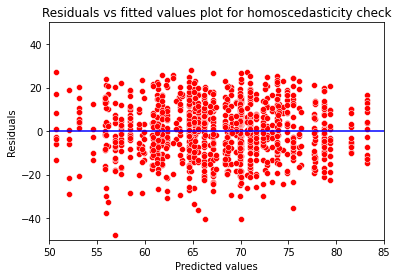

In [292]:
p = sns.scatterplot(model_linreg.predict(), model_linreg.resid, color = 'red')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-50,50)
plt.xlim(50,85)
p = sns.lineplot([50,85], [0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')


Next we use a test to check for homoscedasticity.

Using **Goldfeld Quandt**, we test for heteroscedasticity.

- Null Hypothesis: Error terms are homoscedastic.
- Alternative Hypothesis: Error terms are heteroscedastic.

In [293]:
alpha = 0.05
f2, p, o = test = sms.het_goldfeldquandt(model_linreg.resid, model_linreg.model.exog)
print('Alpha = ', alpha)
print('p = %1.2f' %p)
if p < alpha:
     print("We can reject the null hypothesis: Error terms are heteroscedastic")
else:
  print("We cannot reject the null hypothesis: Error terms are homoscedastic")

Alpha =  0.05
p = 0.32
We cannot reject the null hypothesis: Error terms are homoscedastic


Since the *p*-value is more than 0.05 in Goldfeld Quandt Test, we can't reject its null hypothesis that error terms are homoscedastic. Good!

Now using **Breush-Pagan** test:

In [294]:
l, p, f, fp = sms.het_breuschpagan(model_linreg.resid, model_linreg.model.exog)
print('Alpha = ', alpha)
print('p = %1.2f' %p)
if p < alpha:
     print("We can reject the null hypothesis: Error terms are heteroscedastic")
else:
  print("We cannot reject the null hypothesis: Error terms are homoscedastic")

Alpha =  0.05
p = 0.09
We cannot reject the null hypothesis: Error terms are homoscedastic


Again, the *p*-value is more than 0.05 in Goldfeld Quandt Test, we can't reject its null hypothesis that error terms are homoscedastic.